# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
import matplotlib.pyplot as plt
import wetting

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Surface Evolver simulation data files

3.1038034027355366 1.5127344737126813 30
3.1038034027355366 1.6337298201098602 35
3.1038034027355366 1.6323381620768944 40
3.1038034027355366 1.5993300487610582 45
3.1038034027355366 1.5661481719411272 50
3.1038034027355366 1.5342636955555138 55
3.1038034027355366 1.5028050010331306 60
3.1038034027355366 1.4724465656646282 65
3.1038034027355366 1.4387805359347863 70
3.1038034027355366 1.407912198487466 75
3.1038034027355366 1.3821691311232942 80
3.1038034027355366 1.3614871902103927 85
3.1038034027355366 1.3475835347779899 90
3.5640109725236533 1.642038152564913 30
3.5640109725236533 1.6156769471517967 35
3.5640109725236533 1.65035195732532 40
3.5640109725236533 1.6464776123372051 45
3.5640109725236533 1.6086011526560342 50
3.5640109725236533 1.5660832573829984 55
3.5640109725236533 1.5253770988739406 60
3.5640109725236533 1.4876730101796234 65
3.5640109725236533 1.4505663476082702 70
3.5640109725236533 1.4131501061514542 75
3.5640109725236533 1.3772248338446804 80
3.5640109725236533 1

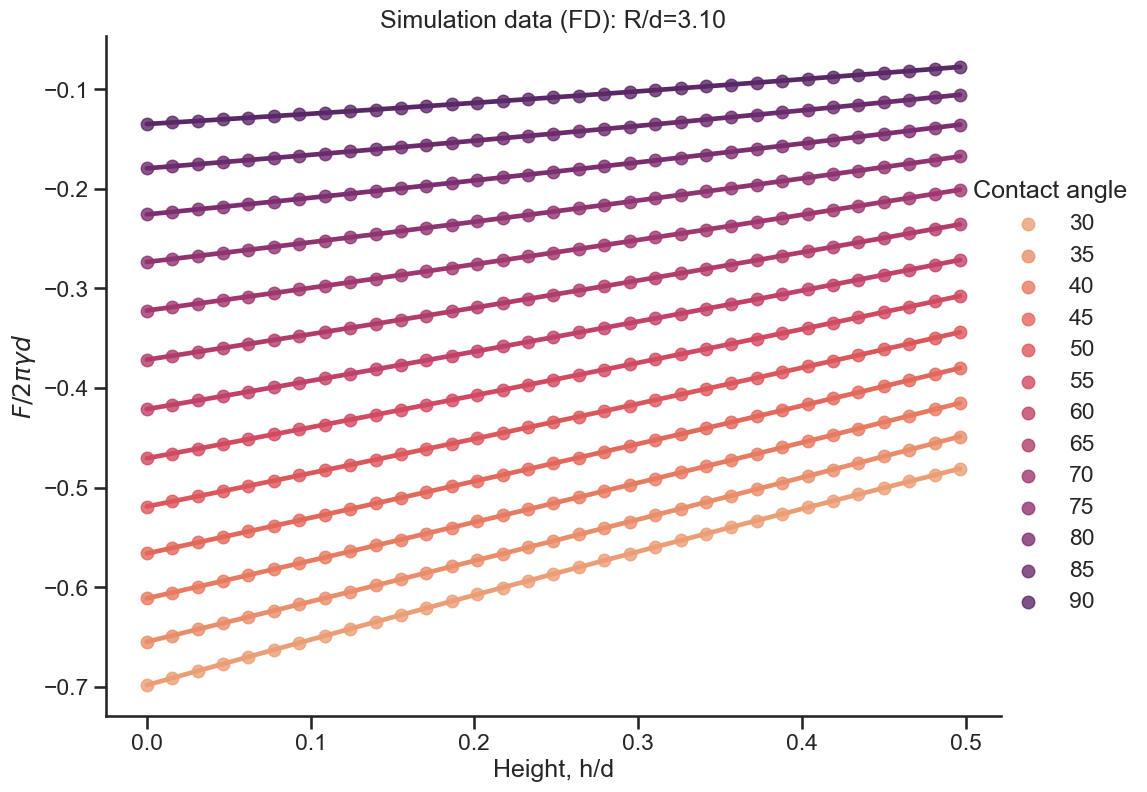

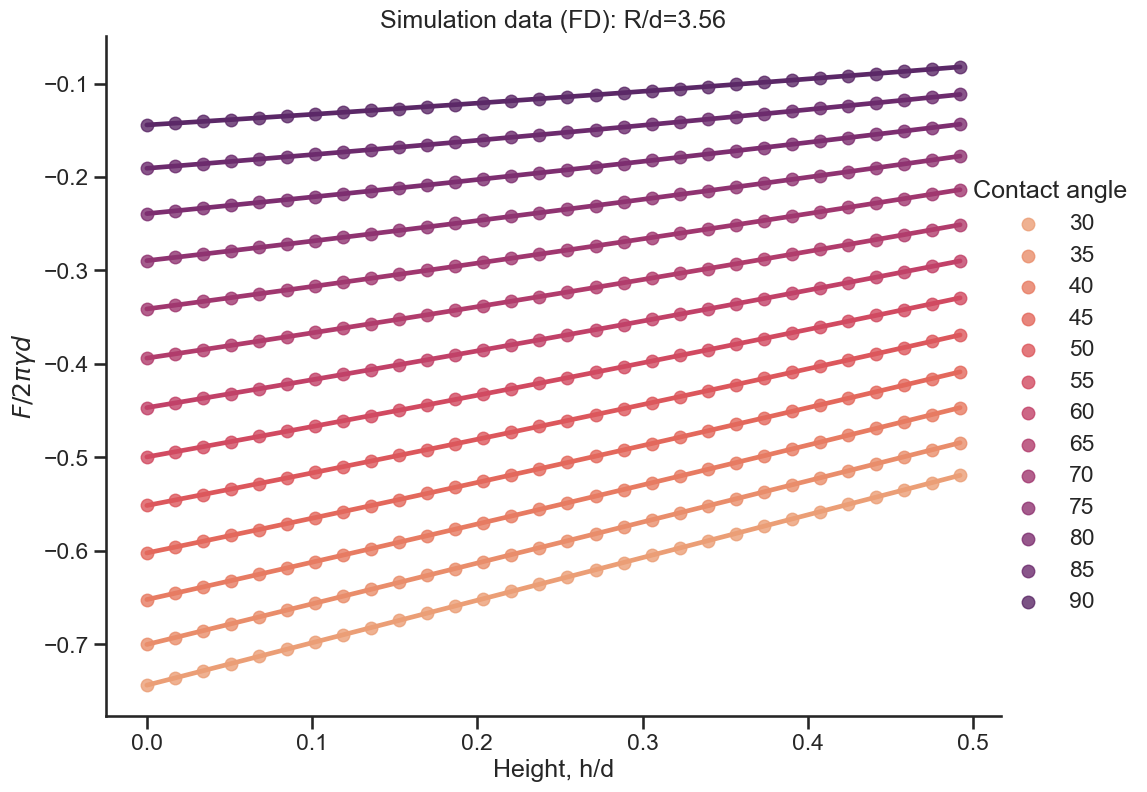

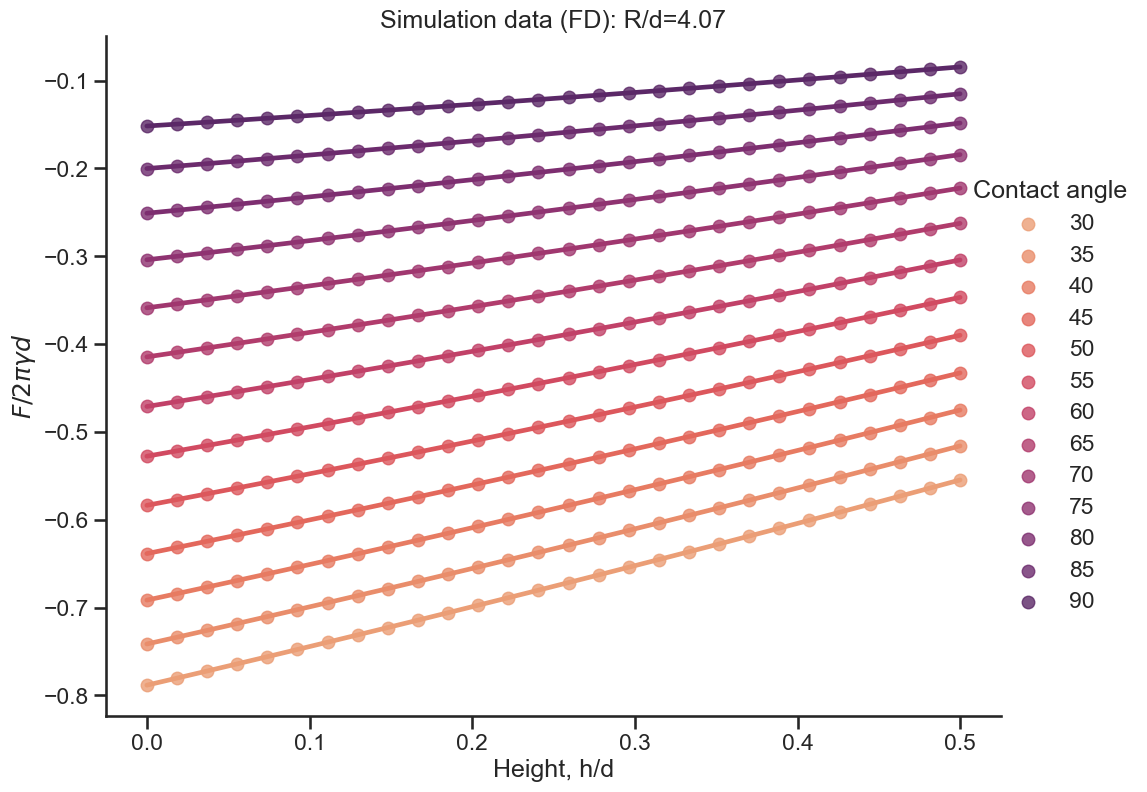

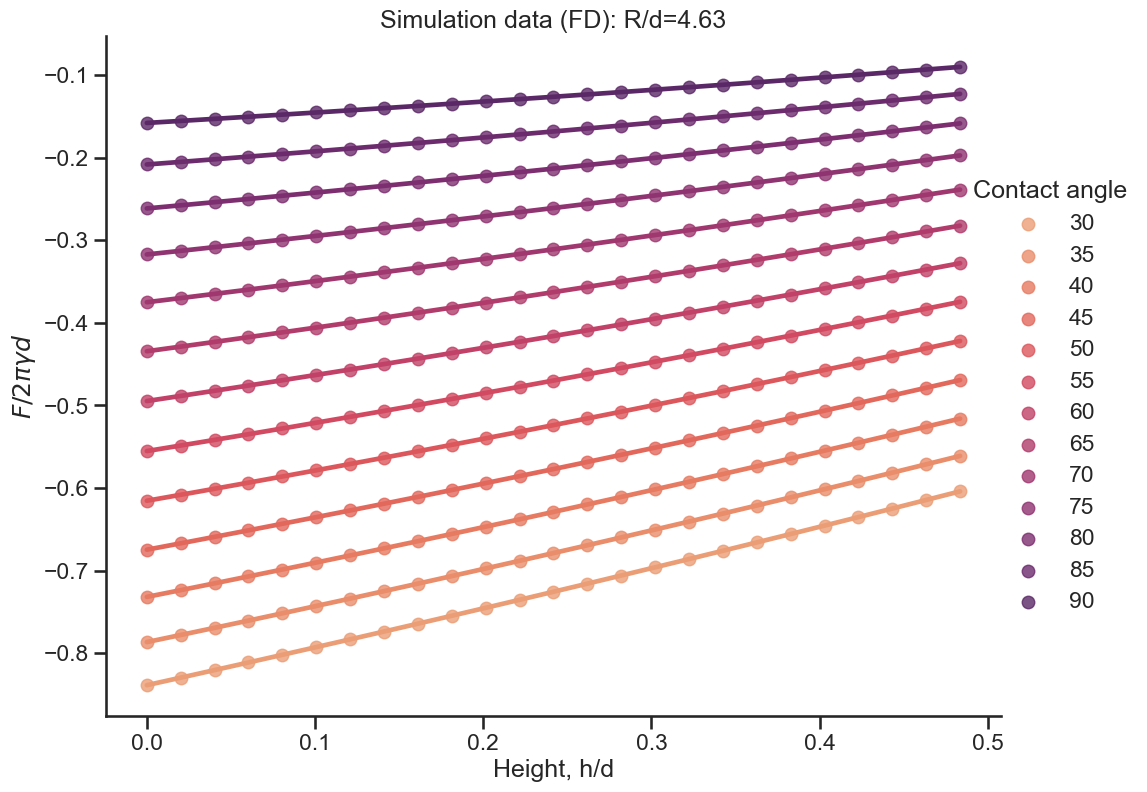

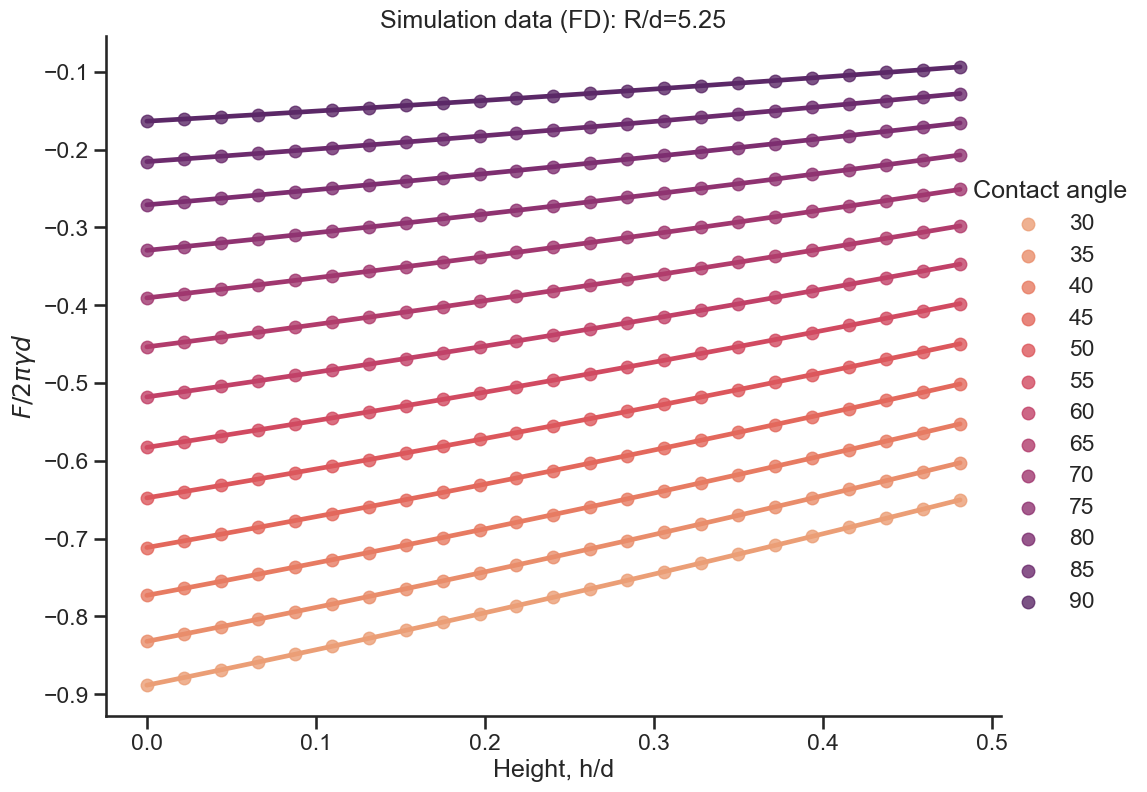

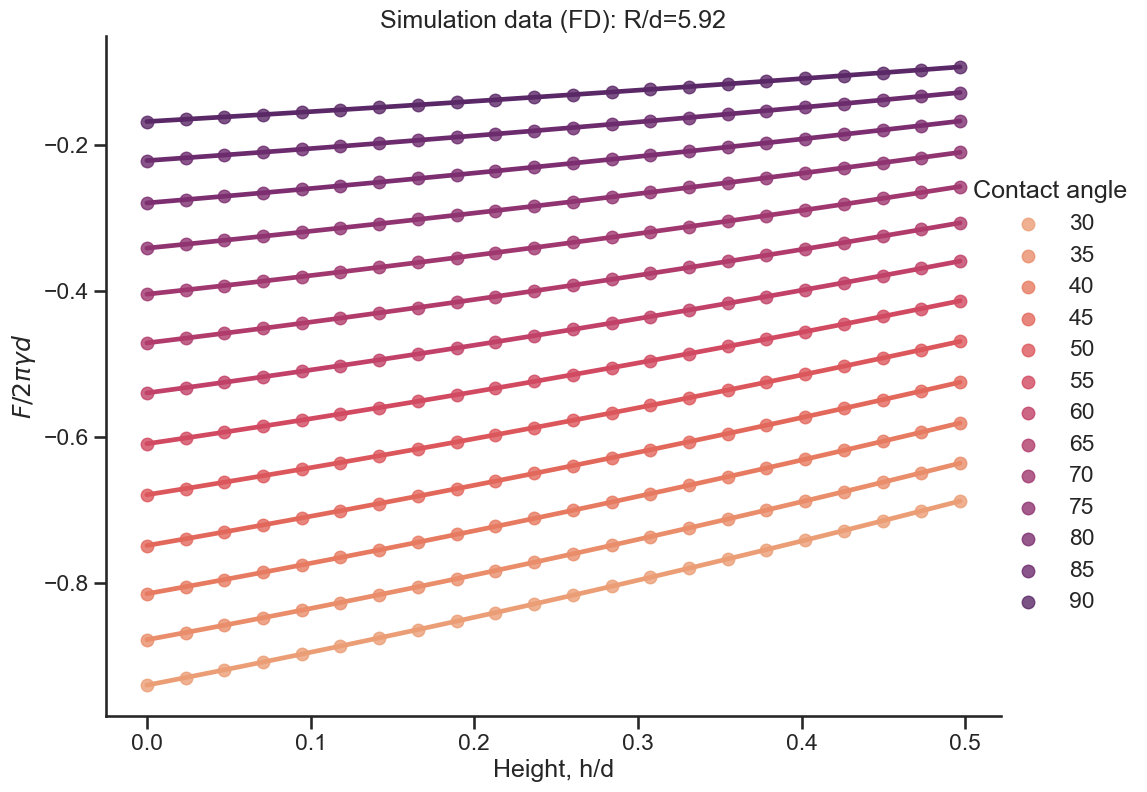

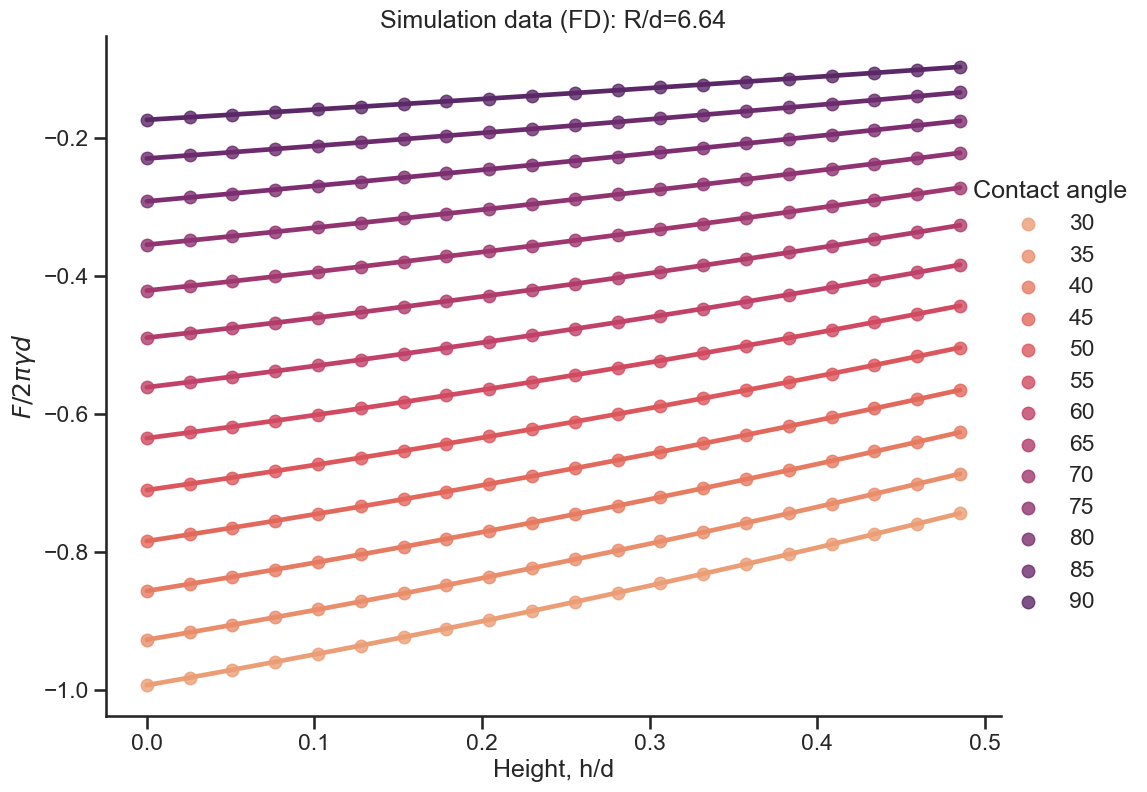

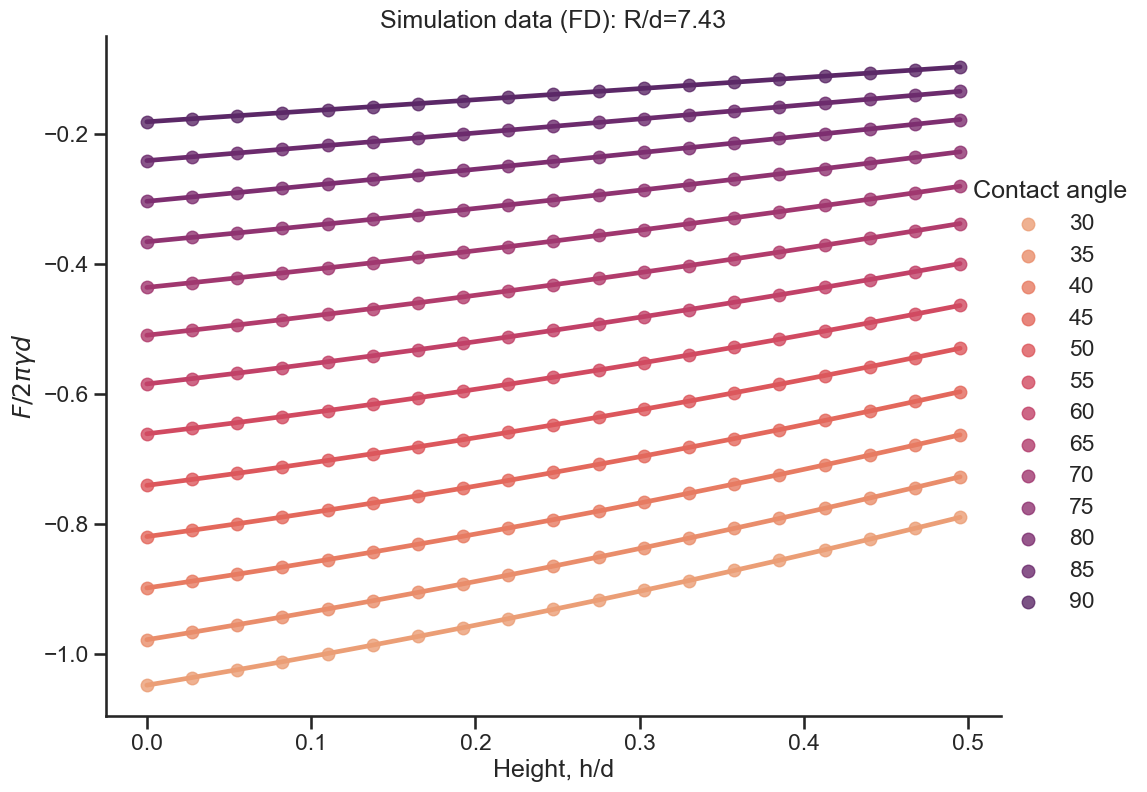

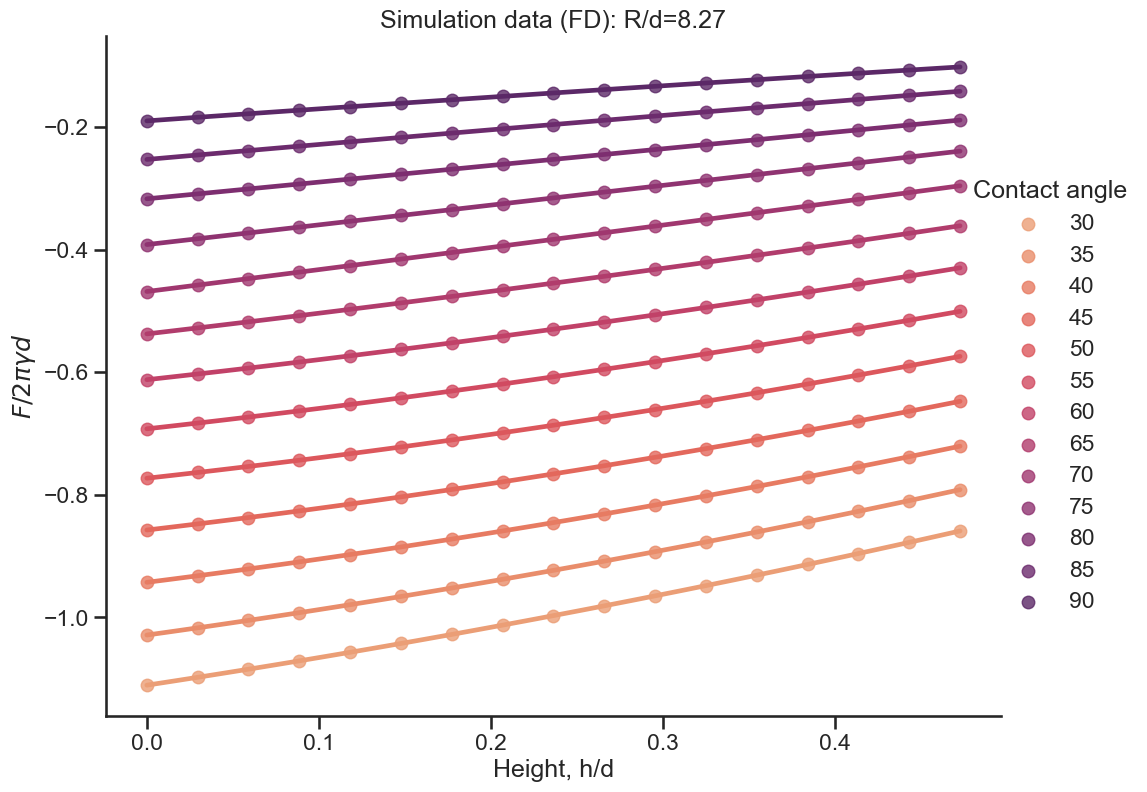

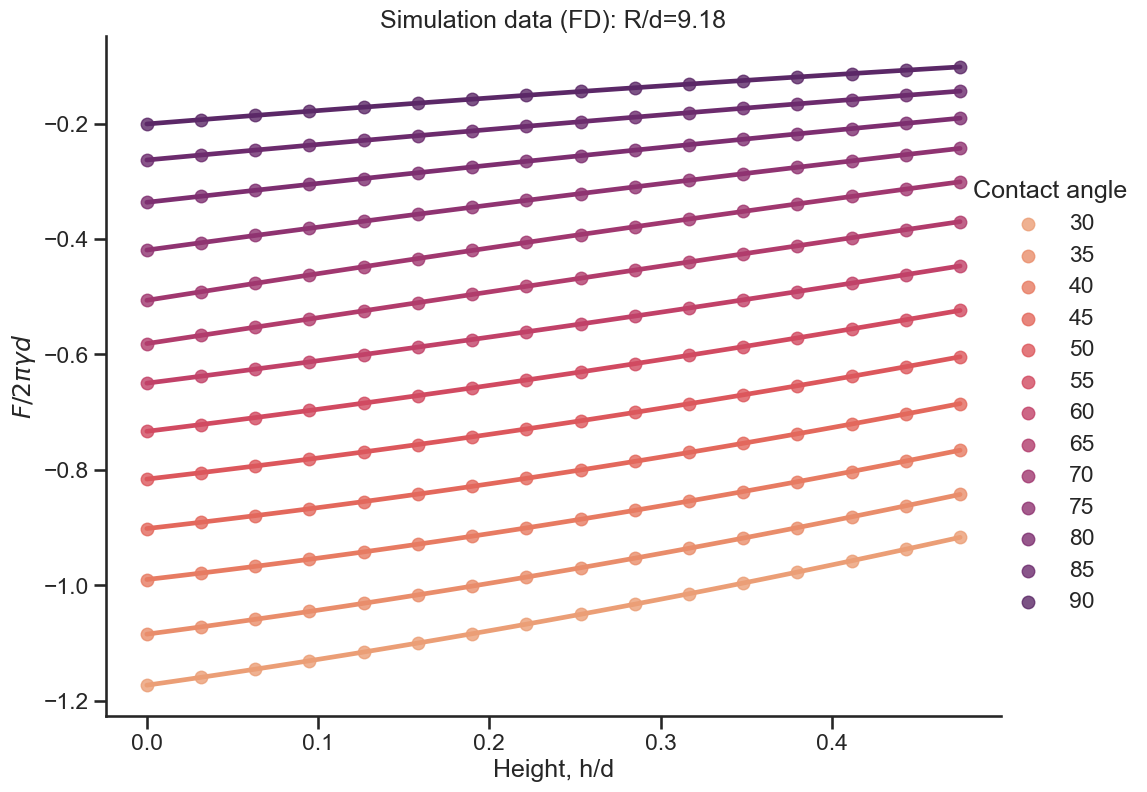

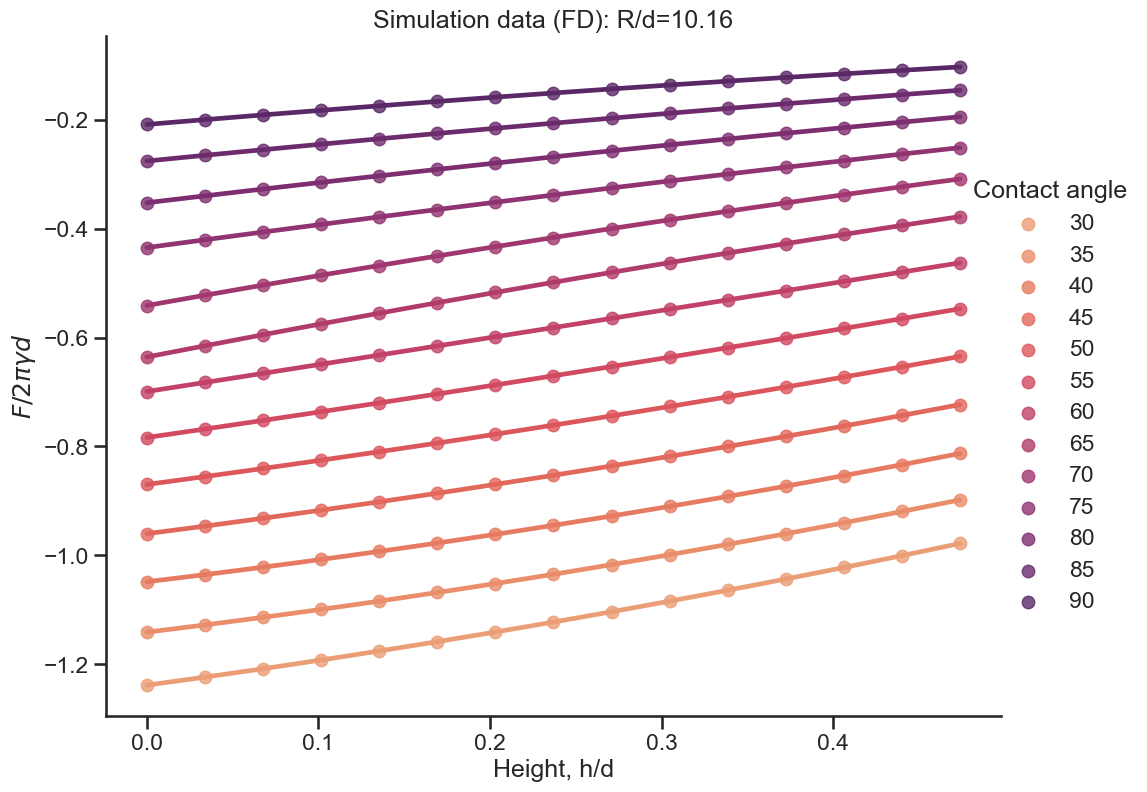

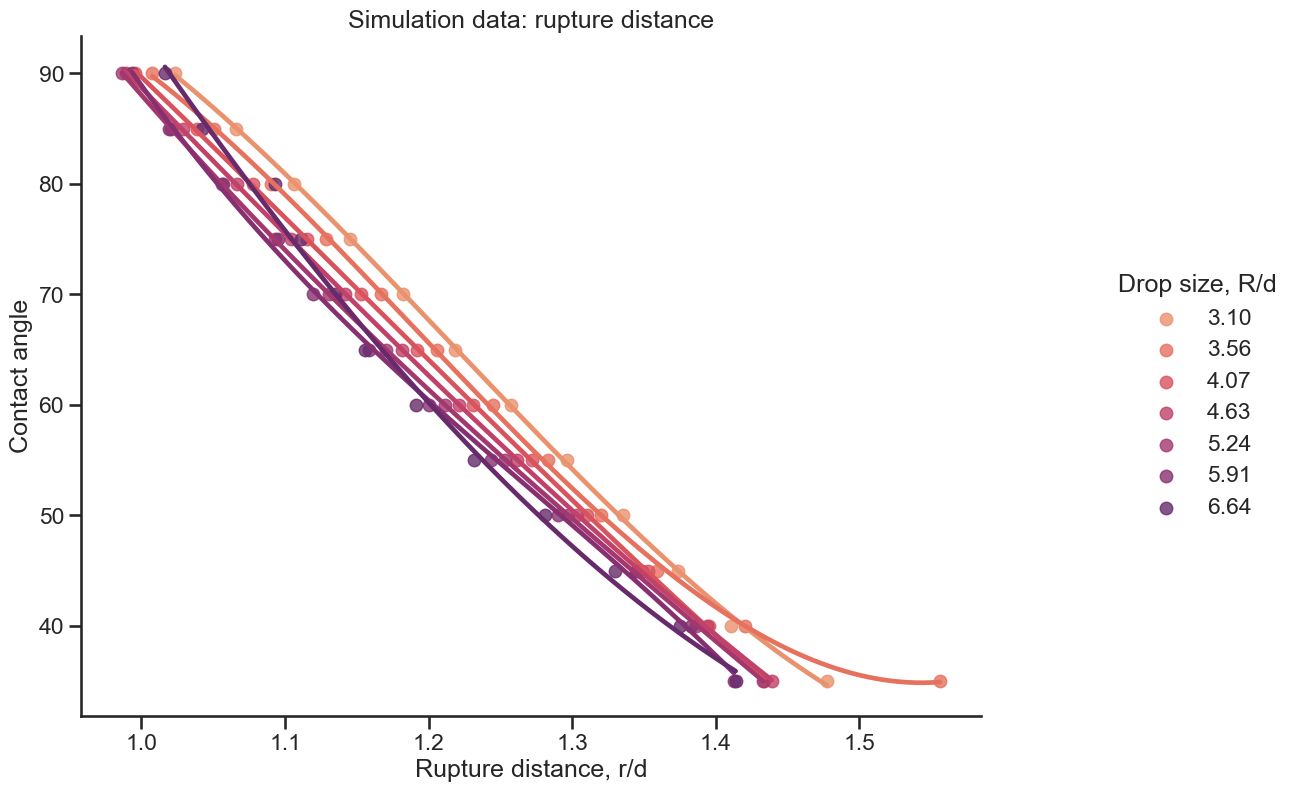

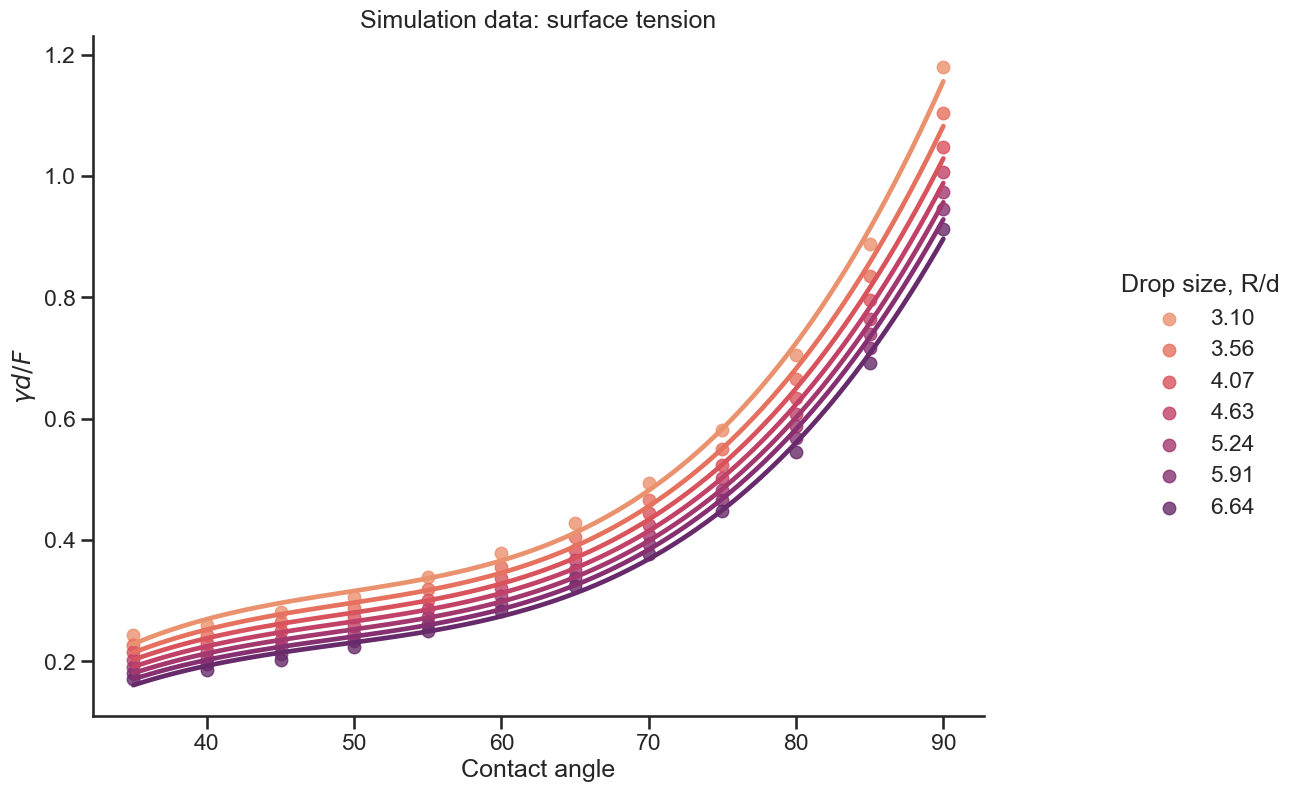

In [49]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220325_rfesp_np_fd/'

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = wetting.combine_simul_dirs(simu_folderpath, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## JPK data raw files

In [55]:
jpk_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK data files') #JPK data (*.jpk,*.jpk-qi-data,*.jpk-force)
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder
        
#separate image data and force data files
img_file_paths = []
fd_file_paths = []
for filepath in jpk_file_paths:
    file_ext = filepath.split('.')[-1]
    if file_ext in ['jpk', 'jpk-qi-data']:
        img_file_paths.append(filepath)
    elif file_ext in ['jpk-force']:
        fd_file_paths.append(filepath)
        
#make output directory
if output_dir == '':
        output_dir = os.path.dirname(jpk_file_paths[0]) + '/analysis' #default "analysis" folder
output_paths = []
for img_file_path in img_file_paths:
    file_name = os.path.basename(img_file_path)
    timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
    output_path = f'{output_dir}/{file_name}_results_{timestamp}'
    os.makedirs(output_path, exist_ok=True)
    output_paths.append(output_path)

print('Image data:\n', img_file_paths, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_paths)

Image data:
 ['E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/save_area2-2022.05.13-16.36.56.317.jpk'] 
Force data:
 ['E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.52.11.091.jpk-force', 'E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.54.43.384.jpk-force', 'E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.57.09.417.jpk-force', 'E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.59.36.461.jpk-force'] 
Output folder:
 ['E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/analysis/save_area2-2022.05.13-16.36.56.317.jpk_results_220520-145019']


## AFM image

Image file: E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/save_area2-2022.05.13-16.36.56.317.jpk
Output folder: E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/analysis/save_area2-2022.05.13-16.36.56.317.jpk_results_220520-145019


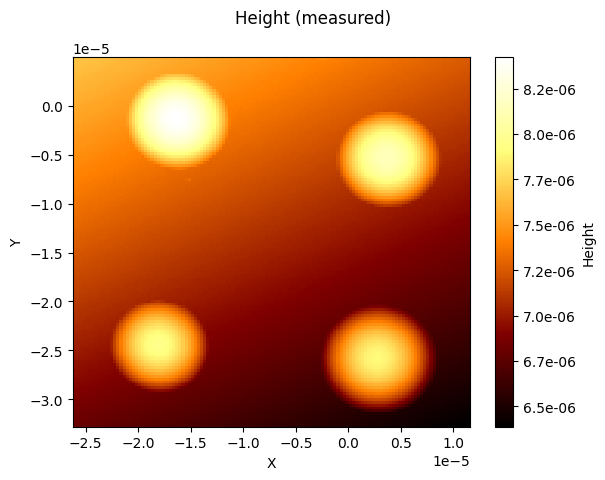

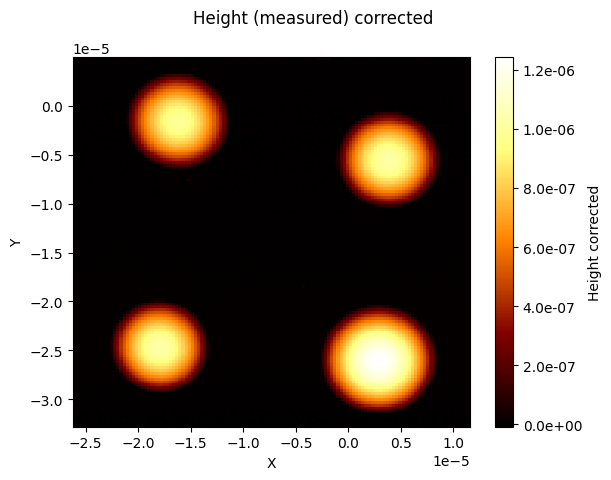

In [56]:
plt.close('all')
for img_file_path, output_path in zip(img_file_paths, output_paths):
    print('Image file:', img_file_path)
    print('Output folder:', output_path)
    afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, 
                                                             level_order=2, jump_tol=0.9)
    for fig in fig_list:
        display(fig)

plt.close('all')

## Get liquid drop properties

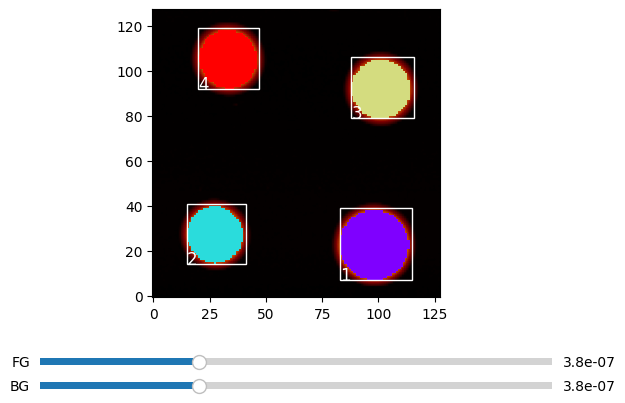

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      1   0.000014        0.000006  1.240623e-06    1.243441e-06   
1      2   0.000012        0.000005  1.029116e-06    1.031271e-06   
2      3   0.000014        0.000005  1.016936e-06    1.027666e-06   
3      4   0.000014        0.000005  9.884019e-07    9.879467e-07   

         Volume    Volume raw  Drop contact angle         s       R/d  \
0  6.459714e-17  5.762501e-17           24.505340  0.000002  4.604686   
1  3.875468e-17  3.309110e-17           23.911135  0.000002  4.722636   
2  4.342564e-17  3.624702e-17           22.210813  0.000002  5.094498   
3  4.070159e-17  3.413973e-17           21.986000  0.000002  5.147912   

                                            AFM file  
0  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...  
1  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...  
2  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...  
3  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...

In [57]:
plt.close('all')
#drop analysis of AFM data
drop_df, img_anal, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_paths[0])
drop_df['AFM file'] = img_file_paths[0]
for fig in fig_list:
    display(fig)
display(drop_df)
plt.close('all')

## Analyze force distance curves

Force file: E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.52.11.091.jpk-force
rupture distance 7.937320884715425e-07
FD wetted length: 9.679025514743271e-07
energy 2 3.158515844220842e-14
Force file: E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.54.43.384.jpk-force
rupture distance 9.09862855617808e-07
FD wetted length: 1.223230068667436e-06
energy 1 4.8695026315011114e-14
Force file: E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.57.09.417.jpk-force
rupture distance 8.484218106810258e-07
FD wetted length: 1.043235020689023e-06
energy 3 3.547384706387913e-14
Force file: E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbrushCVD/force-save_area2_drops-2022.05.13-16.59.36.461.jpk-force
rupture distance 6.643521259160109e-07
FD wetted length: 9.603973504630116e-07
energy 4 2.8593274015892214e-14


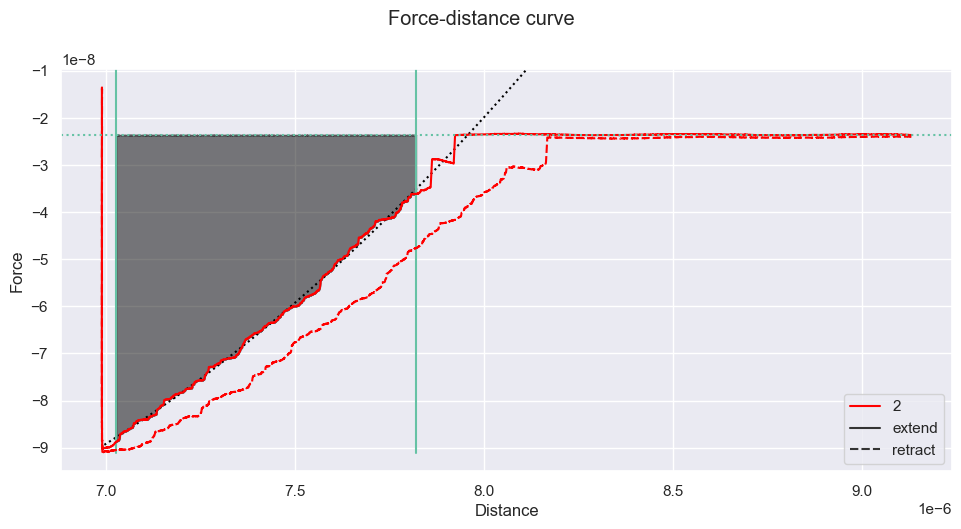

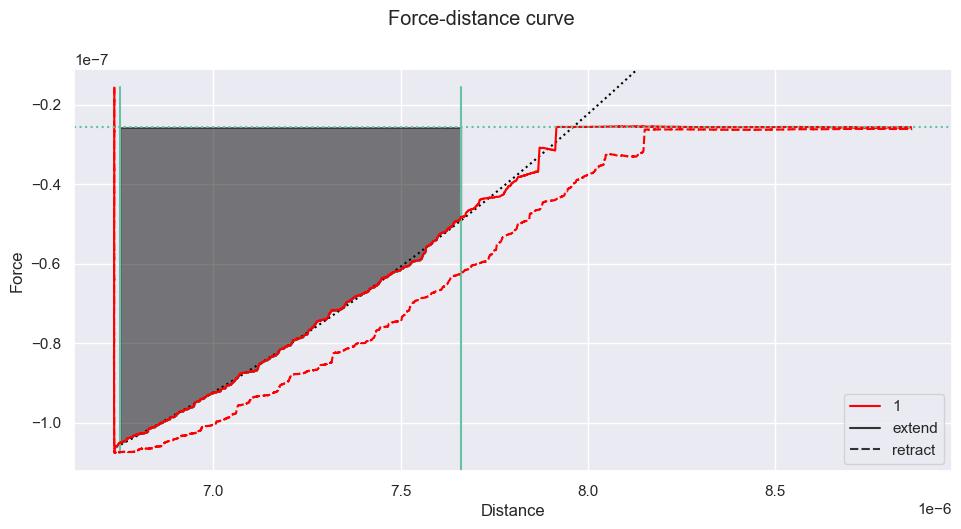

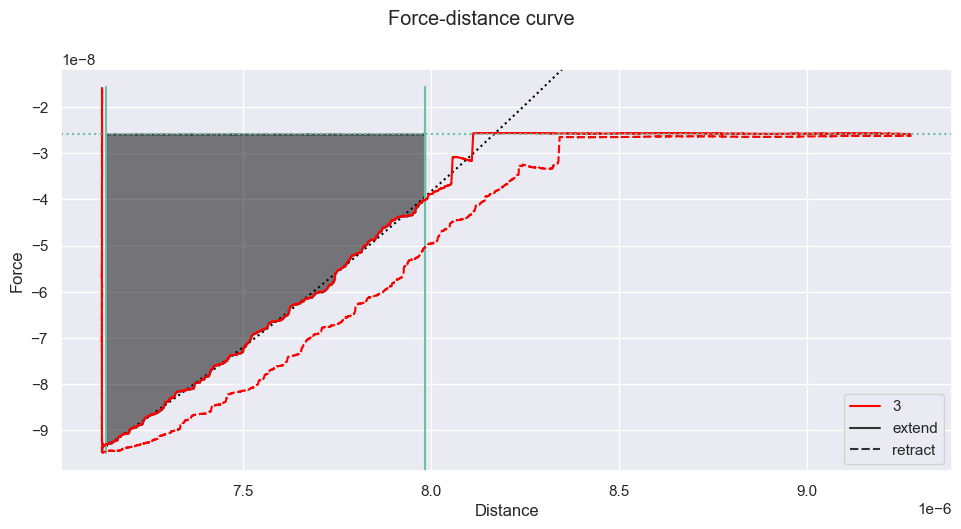

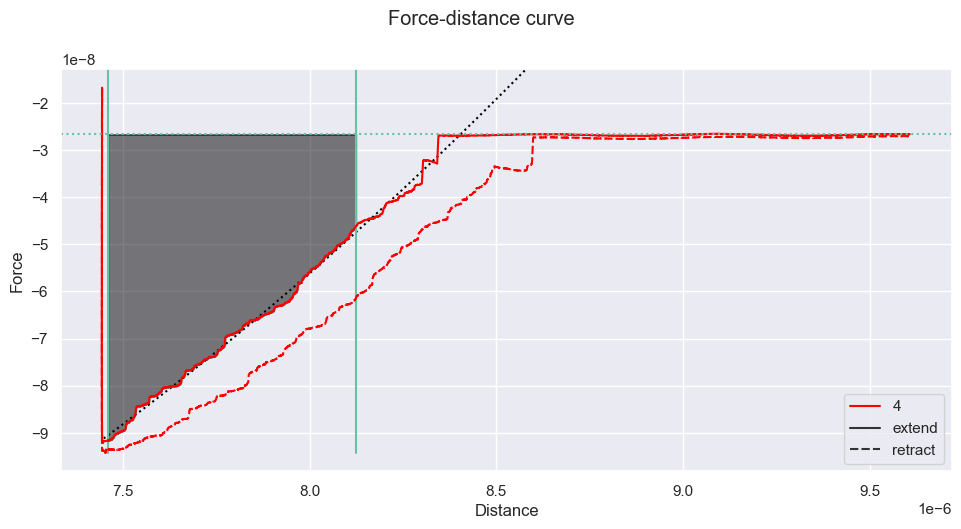

Label  Adhesion (FD)    Slope (FD)  Wetted length (FD)  \
0      2   6.663430e-08  18812.702592        9.679026e-07   
1      1   8.088846e-08  13588.071111        1.223230e-06   
2      3   6.785242e-08   9920.666184        1.043235e-06   
3      4   6.551941e-08   9864.897391        9.603974e-07   

   Rupture distance (FD)  Adhesion energy (FD)  FD X position  FD Y position  \
0           7.937321e-07          3.158516e-14      -0.000018      -0.000025   
1           9.098629e-07          4.869503e-14       0.000003      -0.000026   
2           8.484218e-07          3.547385e-14       0.000004      -0.000006   
3           6.643521e-07          2.859327e-14      -0.000016      -0.000002   

                                             FD file  
0  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...  
1  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...  
2  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...  
3  E:/Work/AFM/20220513 mineral oil_RFESPA_pdmsbr...

In [78]:
fd_drop_df, fig_list = wetting.analyze_drop_fd(fd_file_paths, afm_data, img_anal,
                                               force_cycle = 'approach', fit_order = 2,
                                               output_path = output_paths[0])
for fig in fig_list:
    display(fig)
display(fd_drop_df)

## Droplet surface tension calculation

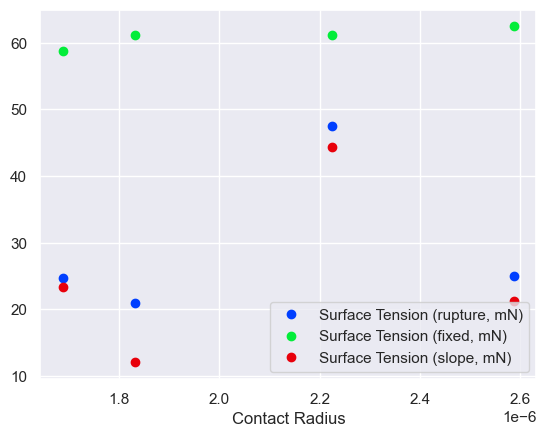

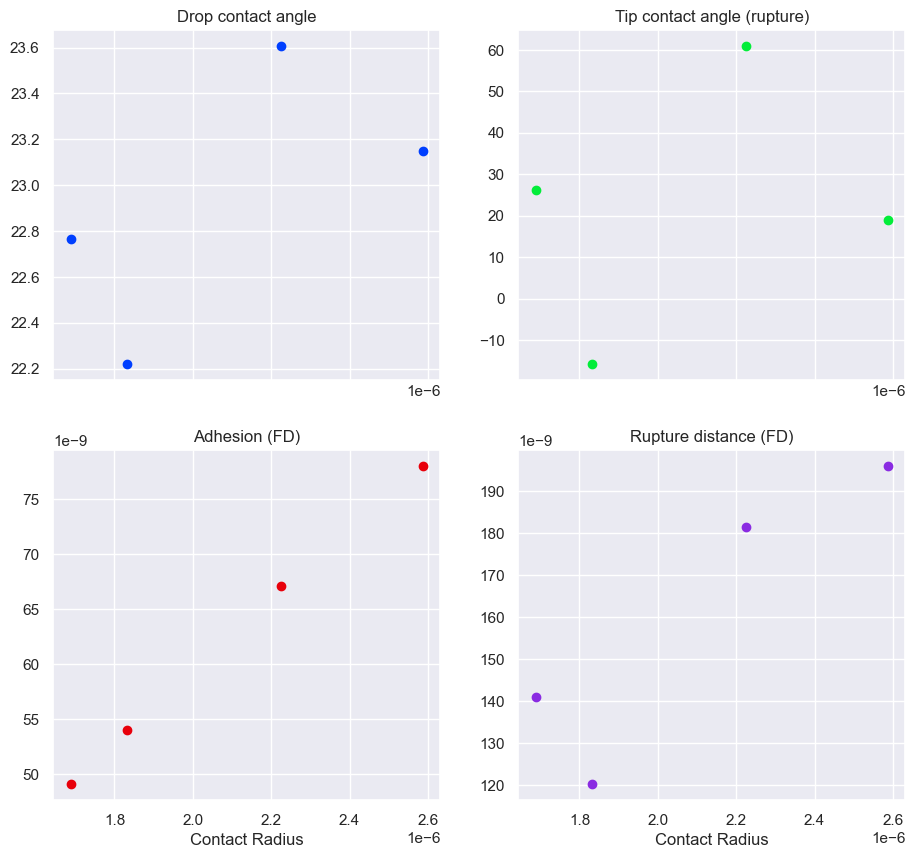

Curvature  Contact Radius    Max Height  Max Height raw        Volume  \
Label                                                                          
2       0.000004        0.000002  3.398226e-07    3.758249e-07  1.541264e-18   
3       0.000006        0.000002  4.647993e-07    5.006371e-07  3.664689e-18   
5       0.000007        0.000003  5.298339e-07    5.646503e-07  5.647970e-18   
7       0.000005        0.000002  3.595996e-07    3.947337e-07  1.918758e-18   

         Volume raw  Drop contact angle  Max Adhesion             s       R/d  \
Label                                                                           
2      1.291805e-18           22.766664  5.662298e-08  7.165769e-07  4.966904   
3      3.573092e-18           23.606149  7.417172e-08  9.564219e-07  4.785447   
5      5.639253e-18           23.148696  8.427201e-08  1.104760e-06  4.882718   
7      1.715288e-18           22.218449  6.121458e-08  7.708630e-07  5.092702   

       ... FD Y position                                            FD file  \
Label  ...                                                                    
2      ...     -0.000025  E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...   
3      ...     -0.000018  E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...   
5      ...     -0.000012  E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...   
7      ...     -0.000006  E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...   

       Simulation R/s  Surface Tension (rupture, mN)  \
Label                                                  
2            5.246771                      24.714035   
3            4.633466                      47.480750   
5            4.633466                      24.950447   
7            5.246771                      21.002246   

       Tip contact angle (rupture)  F_fit_actual  Surface Tension (fixed, mN)  \
Label                                                                           
2                        26.156086     -0.929440                    58.810843   
3                        60.897340     -0.484097                    61.256317   
5                        19.068766     -0.939479                    62.469274   
7                       -15.875042     -1.138325                    61.210243   

       Tip contact angle (fixed) F_fit_fixed  \
Label                                          
2                           70.0   -0.390578   
3                           70.0   -0.375231   
5                           70.0   -0.375231   
7                           70.0   -0.390578   

                                         Simulation file  
Label                                                     
2      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
7      E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[4 rows x 27 columns]

Curvature  Contact Radius    Max Height  Max Height raw        Volume  \
Label                                                                          
2       0.000004        0.000002  3.398226e-07    3.758249e-07  1.541264e-18   
3       0.000006        0.000002  4.647993e-07    5.006371e-07  3.664689e-18   
5       0.000007        0.000003  5.298339e-07    5.646503e-07  5.647970e-18   
7       0.000005        0.000002  3.595996e-07    3.947337e-07  1.918758e-18   

         Volume raw  Drop contact angle  Max Adhesion             s       R/d  \
Label                                                                           
2      1.291805e-18           22.766664  5.662298e-08  7.165769e-07  4.966904   
3      3.573092e-18           23.606149  7.417172e-08  9.564219e-07  4.785447   
5      5.639253e-18           23.148696  8.427201e-08  1.104760e-06  4.882718   
7      1.715288e-18           22.218449  6.121458e-08  7.708630e-07  5.092702   

       ... Wetted length (FD)  Rupture distance (FD)  Adhesion energy (FD)  \
Label  ...                                                                   
2      ...       6.304266e-07           1.410712e-07          5.936461e-15   
3      ...       6.664635e-07           1.813682e-07          1.007300e-14   
5      ...       9.774429e-07           1.958943e-07          1.287090e-14   
7      ...       8.617164e-07           1.202294e-07          5.468285e-15   

       FD X position  FD Y position  \
Label                                 
2           0.000016      -0.000025   
3           0.000014      -0.000018   
5          -0.000002      -0.000012   
7           0.000014      -0.000006   

                                                 FD file      yd/F  \
Label                                                                
2      E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...  0.161813   
3      E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...  0.306888   
5      E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...  0.144023   
7      E:/Work/AFM/20220518 mineral oil_NP_pdmsbrushC...  0.079995   

       Surface Tension FD (mN) Simulation contact angle  \
Label                                                     
2                    23.353858                23.247145   
3                    44.321077                57.957525   
5                    21.211833                 8.208599   
7                    12.016426               -50.493109   

                                         Simulation file  
Label                                                     
2      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
7      E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[4 rows x 23 columns]

In [46]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 70 #Set fixed value to calculate its corresponsing surface tension

#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(afm_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_paths[0], True)

#output_df_filtered = output_df.dropna(subset=['FD file'])


# calculate surface tension from FD fitting
output_df2 = wetting.get_surface_tension2(afm_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_paths[0], save=True)
#output_df_filtered2 = output_df2[output_df['FD file'] != '']


ax = output_df.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df2['Contact Radius'],output_df2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_paths[0]}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Rupture distance (FD)']
ax = output_df.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_paths[0]}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df)
display(output_df2)
plt.close('all')

## Combine results from different folders

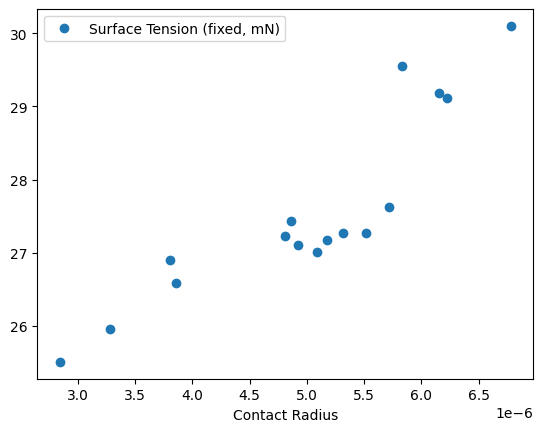

Label     Curvature  Contact Radius    Max Height  Max Height raw  \
0      1  1.674239e-05    6.157481e-06  1.173413e-06    1.176261e-06   
1      2  1.658482e-05    6.227310e-06  1.213520e-06    1.213881e-06   
2      3  1.894432e-05    6.781209e-06  1.255271e-06    1.258837e-06   
3      4  1.637195e-05    5.831479e-06  1.073761e-06    1.073698e-06   
0      1  1.674239e-05    6.157481e-06  1.173413e-06    1.176261e-06   
1      2  1.658482e-05    6.227310e-06  1.213520e-06    1.213881e-06   
2      3  1.894432e-05    6.781209e-06  1.255271e-06    1.258837e-06   
3      4  1.637195e-05    5.831479e-06  1.073761e-06    1.073698e-06   
0      1  1.065735e-05    3.860449e-06  7.237681e-07    7.231064e-07   
1      2  9.147127e-06    3.277518e-06  6.073489e-07    6.081277e-07   
2      3  8.553467e-06    2.844199e-06  4.867249e-07    4.900713e-07   
3      4  1.103012e-05    3.801442e-06  6.757686e-07    6.753954e-07   
4      5  6.870082e-06    1.840481e-06  2.511202e-07    2.599466e-07   
5      6  3.249245e-07    2.996106e-07  1.991890e-07    2.512266e-07   
0      1  1.065735e-05    3.860449e-06  7.237681e-07    7.231064e-07   
1      2  9.147127e-06    3.277518e-06  6.073489e-07    6.081277e-07   
2      3  8.553467e-06    2.844199e-06  4.867249e-07    4.900713e-07   
3      4  1.103012e-05    3.801442e-06  6.757686e-07    6.753954e-07   
0      1  1.376725e-05    5.714617e-06  1.242063e-06    1.244770e-06   
1      2  1.199087e-05    4.862701e-06  1.030254e-06    1.032407e-06   
2      3  1.369428e-05    5.179605e-06  1.017332e-06    1.027882e-06   
3      4  1.359125e-05    5.089097e-06  9.887437e-07    9.882893e-07   
0      1  1.376725e-05    5.714617e-06  1.242063e-06    1.244770e-06   
1      2  1.199087e-05    4.862701e-06  1.030254e-06    1.032407e-06   
2      3  1.369428e-05    5.179605e-06  1.017332e-06    1.027882e-06   
3      4  1.359125e-05    5.089097e-06  9.887437e-07    9.882893e-07   
0      1  1.046537e-05    4.810952e-06  1.171355e-06    1.175492e-06   
1      2  1.054729e-05    4.925837e-06  1.220905e-06    1.219268e-06   
2      3  1.228304e-05    5.314052e-06  1.209020e-06    1.205708e-06   
3      4  1.284478e-05    5.517966e-06  1.245624e-06    1.248238e-06   
0      1  1.046537e-05    4.810952e-06  1.171355e-06    1.175492e-06   
1      2  1.054729e-05    4.925837e-06  1.220905e-06    1.219268e-06   
2      3  1.228304e-05    5.314052e-06  1.209020e-06    1.205708e-06   
3      4  1.284478e-05    5.517966e-06  1.245624e-06    1.248238e-06   

         Volume    Volume raw  Drop contact angle  Max Adhesion  \
0  7.072981e-17  6.048181e-17           21.578634           NaN   
1  7.485670e-17  6.534649e-17           22.054140           NaN   
2  9.170729e-17  8.009385e-17           20.974642           NaN   
3  5.800499e-17  4.846766e-17           20.866223           NaN   
0  7.072981e-17  6.048181e-17           21.578634           NaN   
1  7.485670e-17  6.534649e-17           22.054140           NaN   
2  9.170729e-17  8.009385e-17           20.974642           NaN   
3  5.800499e-17  4.846766e-17           20.866223           NaN   
0  1.714169e-17  1.560711e-17           21.237417           NaN   
1  1.036552e-17  9.041134e-18           20.996515           NaN   
2  6.245143e-18  5.012872e-18           19.421804           NaN   
3  1.550120e-17  1.378008e-17           20.159932           NaN   
4  1.344470e-18  3.204188e-19           15.539224           NaN   
5  3.222467e-20  0.000000e+00           67.234004           NaN   
0  1.714169e-17  1.560711e-17           21.237417           NaN   
1  1.036552e-17  9.041134e-18           20.996515           NaN   
2  6.245143e-18  5.012872e-18           19.421804           NaN   
3  1.550120e-17  1.378008e-17           20.159932           NaN   
0  6.471769e-17  5.778598e-17           24.524849           NaN   
1  3.883912e-17  3.314374e-17           23.924574           NaN   
2  4.342353e-17  3.623017e-17           22.224164           NaN   
3  4.073

In [53]:
plt.close('all')
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']
summary_df = summary_df[summary_df['Surface Tension (fixed, mN)'] != 0]
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=[#'Surface Tension (rupture, mN)',
                        'Surface Tension (fixed, mN)'#,
                        #'Surface Tension FD (mN)'
                       ],
                             marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
display(fig3)
display(summary_df)
plt.close('all')

## Combine multiple FD curves

In [67]:
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

